# Лабораторная работа №3

In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Задание №1

1. Создайте объект Series, значениями которого являются целые числа от 1 до 5, а
индексами символы 'a', 'b', 'c', 'd', 'e'.

In [2]:
obj = Series([1, 2, 3, 4, 5], index=['a', 'b', 'c', 'd', 'e'])

1. С помощью обращения по явному индексу получите значение 4.

In [3]:
print(obj['d'])

4


2. С помощью обращения по неявному индексу получите значение 2.

In [4]:
print(obj[1])

2


3. Добавьте в серию новый элемент.

In [5]:
obj['f'] = 6
print(obj['f'])

6


4. Используя операцию среза, получите значения 3, 4, 5.

In [6]:
print(obj['c':'e'].values)

[3 4 5]


5. Создайте объект DataFrame из списка [[1, 2], [5, 3], [3.7, 4.8]] с именами столбцов
col1 и col2.

In [7]:
data = [[1, 2], [5, 3], [3.7, 4.8]]
frame = DataFrame(data, columns=['col1', 'col2'])
frame

,col1,col2
0,1.0,2.0
1,5.0,3.0
2,3.7,4.8


6. Используя операцию индексации, получите элемент 3.7.

In [8]:
frame['col1'][2]

3.7

7. Измените элемент 3 на 9.

In [9]:
frame['col2'][1] = 9
frame

,col1,col2
0,1.0,2.0
1,5.0,9.0
2,3.7,4.8


8. Используя операцию среза, получите строки с индексами 1 и 2.

In [10]:
frame[1:3]

,col1,col2
1,5.0,9.0
2,3.7,4.8


9. Добавьте столбец col3, значения которого – результат поэлементного
перемножения col1 и col2.

In [11]:
frame['col3'] = frame['col1'] * frame['col2']
frame

,col1,col2,col3
0,1.0,2.0,2.00
1,5.0,9.0,45.00
2,3.7,4.8,17.76


## Задание №2

Дан список списков data.

In [12]:
data = [
    ["Вжик", "Zipper the Fly", "fly", "0.7"],
    ["Гайка", "Gadget Hackwrench", "mouse", None],
    ["Дейл", "Dale", "chipmunk", "1"],
    ["Рокфор", "Monterey Jack", "mouse", "0.8"],
    ["Чип", "Chip", "chipmunk", "0.2"]
]

На первом месте указывается имя героя на русском (ru_name), затем имя на английском
(en_name), вид героя (class) и индекс веселости, который измеряется в «Дейлах» (cheer).

1. На основе этого списка создайте датафрейм df так, чтобы каждому показателю
(ru_name, en_name, class, cheer) соответствовал один столбец датафрейма.
Проверьте, что последний столбец является числовым. Если нет, приведите его к
типу float.

In [13]:
df = DataFrame(data)
df[3] = df[3].astype('float')
df

,0,1,2,3
0,Вжик,Zipper the Fly,fly,0.7
1,Гайка,Gadget Hackwrench,mouse,NaN
2,Дейл,Dale,chipmunk,1.0
3,Рокфор,Monterey Jack,mouse,0.8
4,Чип,Chip,chipmunk,0.2


2. Выведите число строк датафрейма df.

In [14]:
len(df)

5

3. Выведите число заполненных (не NaN) ячеек в последнем столбце.

In [15]:
df[3].notnull().sum()

4

4. Выведите значение в ячейке, которая находится на пересечении третьей строки и
второго столбца.

In [16]:
df[1][2]

'Dale'

5. Сохраните в переменную df1 строки датафрейма df со второй по четвертую
включительно и столбцы с первого по третий включительно. Продемонстрируйте
содержимое df1.

In [17]:
df1 = df.loc['1':'3', '0':'2']
df1

,0,1,2
1,Гайка,Gadget Hackwrench,mouse
2,Дейл,Dale,chipmunk
3,Рокфор,Monterey Jack,mouse


6. Присвойте столбцам датафрейма df следующие названия: ru_name, en_name, class,
cheer.

In [18]:
df.rename(columns={0: 'ru_name', 1: 'en_name', 2: 'class', 3: 'cheer'}, inplace=True)
df

,ru_name,en_name,class,cheer
0,Вжик,Zipper the Fly,fly,0.7
1,Гайка,Gadget Hackwrench,mouse,NaN
2,Дейл,Dale,chipmunk,1.0
3,Рокфор,Monterey Jack,mouse,0.8
4,Чип,Chip,chipmunk,0.2


7. Добавьте в датафрейм df столбец logcheer, который содержит логарифмированные
значения cheer (если в cheer встречается NaN, то и в logcheer тоже).

In [19]:
df['logcheer'] = np.log(df['cheer'])
df

,ru_name,en_name,class,cheer,logcheer
0,Вжик,Zipper the Fly,fly,0.7,-0.356675
1,Гайка,Gadget Hackwrench,mouse,NaN,NaN
2,Дейл,Dale,chipmunk,1.0,0.000000
3,Рокфор,Monterey Jack,mouse,0.8,-0.223144
4,Чип,Chip,chipmunk,0.2,-1.609438


8. Сохраните массив уникальных значений столбца class в переменную x, а
соответствующие им частоты (сколько раз значение встречается в столбце) — в
переменную y. Используя полученные x и y, постройте столбиковую диаграмму,
barplot, для class. Добавьте заголовок и подписи к осям.

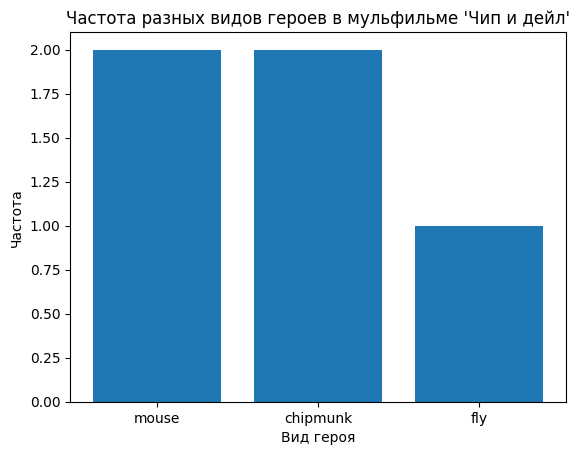

In [20]:
s = df['class'].value_counts()
x = s.index.values
y = s.values
plt.xlabel("Вид героя")
plt.ylabel("Частота")
plt.title("Частота разных видов героев в мульфильме 'Чип и дейл'")
plt.bar(x, y)
plt.show()

## Задание №3

Посмотрите информацию о наборе данных о преступности в Лос-Анджелесе
(https://data.lacity.org/Public-Safety/Crime-Data-from-2010-to-2019/63jg-8b9z). Используя
Pandas, выполните следующие действия:

1. Загрузите случайную выборку из этого набора и далее работайте с ней:
https://github.com/slemeshevsky/python-course-ipynb/blob/master/src-pandas/la-crimes-sample.csv.zip

In [21]:
df = pd.read_csv("csv/la-crimes-sample.csv", nrows=10000)

2. Сколько строк и столбцов в таблице?

In [22]:
print("Строк:", df.shape[0])
print("Столбцов:", df.shape[1])

Строк: 10000
Столбцов: 27


3. Каковы названия столбцов? Какие типы данных у столбцов?

In [23]:
df.dtypes

Unnamed: 0                  int64
DR Number                   int64
Date Reported              object
Date Occurred              object
Time Occurred               int64
Area ID                     int64
Area Name                  object
Reporting District          int64
Crime Code                  int64
Crime Code Description     object
MO Codes                   object
Victim Age                float64
Victim Sex                 object
Victim Descent             object
Premise Code              float64
Premise Description        object
Weapon Used Code          float64
Weapon Description         object
Status Code                object
Status Description         object
Crime Code 1              float64
Crime Code 2              float64
Crime Code 3              float64
Crime Code 4              float64
Address                    object
Cross Street               object
Location                   object
dtype: object

4. Сколько в каждом из них уникальных значений?

In [24]:
df.nunique()

Unnamed: 0                10000
DR Number                 10000
Date Reported              2728
Date Occurred              2719
Time Occurred               502
Area ID                      21
Area Name                    21
Reporting District         1085
Crime Code                  100
Crime Code Description       99
MO Codes                   4226
Victim Age                   87
Victim Sex                    4
Victim Descent               14
Premise Code                150
Premise Description         140
Weapon Used Code             53
Weapon Description           53
Status Code                   5
Status Description            5
Crime Code 1                101
Crime Code 2                 37
Crime Code 3                  4
Crime Code 4                  1
Address                    7374
Cross Street                889
Location                   7418
dtype: int64

5. Сколько пропущенных значений?

In [25]:
df.isna().sum()

Unnamed: 0                   0
DR Number                    0
Date Reported                0
Date Occurred                0
Time Occurred                0
Area ID                      0
Area Name                    0
Reporting District           0
Crime Code                   0
Crime Code Description       1
MO Codes                  1085
Victim Age                 823
Victim Sex                 916
Victim Descent             918
Premise Code                 2
Premise Description         18
Weapon Used Code          6718
Weapon Description        6718
Status Code                  0
Status Description           0
Crime Code 1                 0
Crime Code 2              9363
Crime Code 3              9995
Crime Code 4              9999
Address                      0
Cross Street              8352
Location                     0
dtype: int64

6. Верно ли, что женщины чаще оказываются жертвами по сравнению с мужчинами?

In [26]:
m = df['Victim Sex'].value_counts()['M']
f = df['Victim Sex'].value_counts()['F']
print("М:", m, "Ж:", f)
if f > m:
    print('Верно')
else:
    print('Неверно')

М: 4708 Ж: 4224
Неверно


7. Определите 10 самых распространенных преступлений в Лос-Анджелесе.
Постройте график.

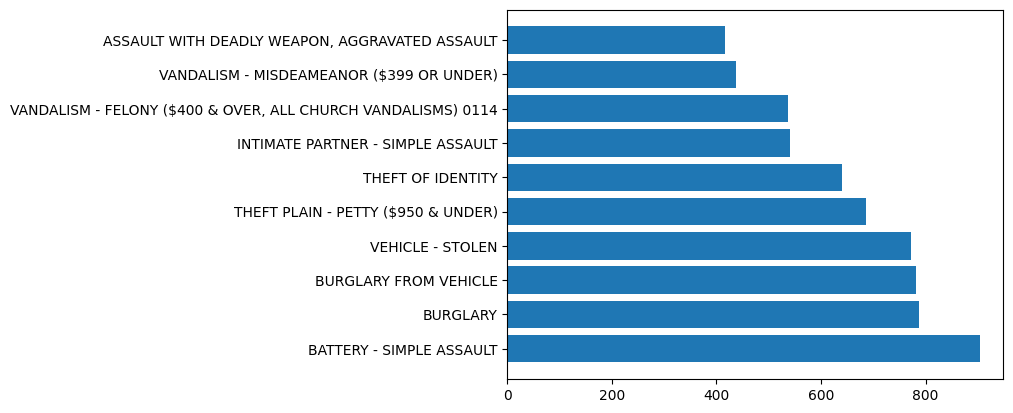

In [27]:
d = df['Crime Code Description'].value_counts()[:10]
x = d.index.values
y = d.values
plt.barh(x, y)
plt.show()

8. От каких преступлений чаще страдают женщины, а от каких мужчины?

In [28]:
df_group = df.groupby(df['Victim Sex'])
m = df_group.get_group('M')['Crime Code Description'].value_counts()[:5]
f = df_group.get_group('F')['Crime Code Description'].value_counts()[:5]
print("Мужчины:\n")
print(m, "\n")
print("Женщины:\n")
print(f)

Мужчины:

BURGLARY                                                        454
BATTERY - SIMPLE ASSAULT                                        435
BURGLARY FROM VEHICLE                                           428
THEFT PLAIN - PETTY ($950 & UNDER)                              383
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS) 0114    315
Name: Crime Code Description, dtype: int64 

Женщины:

BATTERY - SIMPLE ASSAULT             467
INTIMATE PARTNER - SIMPLE ASSAULT    452
BURGLARY FROM VEHICLE                351
THEFT OF IDENTITY                    326
BURGLARY                             317
Name: Crime Code Description, dtype: int64


9. Люди какого происхождения чаще всего подвергаются преступлениям?

In [29]:
D = {
    'A': 'Other Asian',
    'B': 'Black',
    'C': 'Chinese',
    'D': 'Cambodian',
    'F': 'Filipino',
    'G': 'Guamanian',
    'H': 'Hispanic/Latin/Mexican',
    'I': 'American Indian/Alaskan Native',
    'J': 'Japanesea',
    'K': 'Korean',
    'L': 'Laotian',
    'O': 'Other',
    'P': 'Pacific Islander',
    'S': 'Samoan',
    'U': 'Hawaiian',
    'V': 'Vietnamese',
    'W': 'White',
    'X': 'Unknown',
    'Z': 'Asian Indian'
}
d = df['Victim Descent'].value_counts()[:3].index.values
for i, n in enumerate(d):
    print(i + 1, D[n])

1 Hispanic/Latin/Mexican
2 White
3 Black


10. Отсортируйте районы, по количеству преступлений. Постройте график,
показывающий самые безопасный и опасный районы.

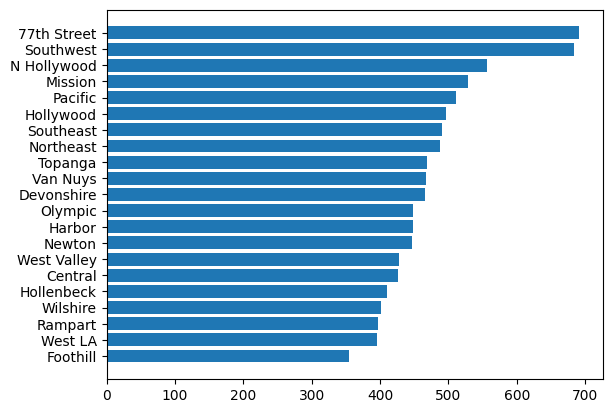

In [30]:
d = df['Area Name'].value_counts().sort_values()
x = d.index.values
y = d.values
plt.barh(x, y)
plt.show()

## Задание №4

В файле polit.csv (https://cloud.mail.ru/public/P5P7/qjm2F8CuN) хранятся некоторые данные,
используемые в исследовании James W.McGuire, “Authoritarianism in the Middle East”.
Показатели:

ctry – страна;

fh09 – индекс Freedom House за 2009 год (от 1 до 7, большие значения соответствуют
меньшему уровню гражданских свобод);

polity09 – индекс Polity2 за 2009 год (от -10 до 10, большие значения соответствуют
большему уровню демократии);

gini – индекс Джини за 2000-2010 годы (индекс имущественного неравенства);

fparl08 – доля женщин в парламенте в 2008 году (в процентах);

mena – регион Middle East and North Africa (1 – да, 0 – нет);

lati – регион Latin America;

cari – регион Caribbean, former British, French, Dutch colony;

east – регион East Asia;

sovi – регион Former Soviet Bloc;

afri – регион Africa;

corr0509 – индекс Control of Corruption, среднее за 2005-2009 годы.

Выполните следующие задания:

1. Загрузите датафрейм из файла polit.csv и сохраните его в переменную polit. Если в
датафрейме есть строки с пропущенными значениями, то удалите их.

In [31]:
polit = pd.read_csv("csv/polit.csv").dropna()

2. Выберите в датафрейме строки, которые соответствуют странам со значениями
индекса Freedom House (fh09) выше 5.

In [32]:
polit.loc[(polit['fh09'] > 5)]

,Unnamed: 0,ctry,fh09,polity09,gini,fparl08,mena,lati,cari,east,sovi,afri,corr0509
2,2,Algeria,5.5,2.0,35.3,6.48,1,0,0,0,0,0,-0.434654
5,5,Angola,5.5,-2.0,58.6,37.27,0,0,0,0,0,0,-1.292684
12,12,Azerbaijan,5.5,-7.0,16.8,11.38,0,0,0,0,0,0,-1.026767
17,17,Belarus,6.5,-7.0,28.8,32.53,0,0,0,0,0,0,-0.765586
31,31,Cambodia,5.5,2.0,44.2,15.76,0,0,0,1,0,0,-1.151233
32,32,Cameroon,6.0,-4.0,44.6,13.89,0,0,0,0,0,1,-1.000362
37,37,Chad,6.5,-2.0,39.8,5.16,0,0,0,0,0,1,-1.346880
40,40,China,6.5,-7.0,41.5,21.33,0,0,0,1,0,0,-0.568752
43,43,"Congo, Dem. Rep.",6.0,5.0,44.4,7.73,0,0,0,0,0,1,-1.428074
44,44,"Congo, Rep.",5.5,-4.0,47.3,9.18,0,0,0,0,0,1,-1.113118


3. Выберите в датафрейме строки, которые соответствуют странам Африки (afri) с
процентом женщин в парламенте (fparl08) выше 30%.

In [33]:
polit.loc[(polit['afri'] == 1) & (polit['fparl08'] > 30)]

,Unnamed: 0,ctry,fh09,polity09,gini,fparl08,mena,lati,cari,east,sovi,afri,corr0509
30,30,Burundi,4.5,6.0,33.3,31.74,0,0,0,0,0,1,-1.095802
133,133,Mozambique,3.5,5.0,47.1,34.80,0,0,0,0,0,1,-0.524405
160,160,Rwanda,5.5,-3.0,46.7,50.94,0,0,0,0,0,1,-0.164223
174,174,South Africa,2.0,9.0,57.8,33.92,0,0,0,0,0,1,0.332960
187,187,Tanzania,3.5,-1.0,34.6,30.41,0,0,0,0,0,1,-0.439213
198,198,Uganda,4.5,-1.0,42.6,30.72,0,0,0,0,0,1,-0.819751


4. Выберите в датафрейме строки, которые соответствуют странам Африки или
Латинской Америки (afri и lati) со значением индекса Polity2 (polity09) больше или
равным 8.

In [34]:
polit.loc[((polit['afri'] == 1) | (polit['lati'] == 1)) & (polit['polity09'] >= 8)]

,Unnamed: 0,ctry,fh09,polity09,gini,fparl08,mena,lati,cari,east,sovi,afri,corr0509
7,7,Argentina,2.0,8.0,48.8,39.76,0,1,0,0,0,0,-0.420793
25,25,Botswana,2.5,8.0,61.0,11.11,0,0,0,0,0,1,0.947725
26,26,Brazil,2.0,8.0,55.0,9.43,0,1,0,0,0,0,-0.119536
39,39,Chile,1.0,10.0,52.0,12.66,0,1,0,0,0,0,1.370524
42,42,Comoros,3.5,9.0,64.3,3.03,0,0,0,0,0,1,-0.709136
45,45,Costa Rica,1.0,10.0,48.9,36.84,0,1,0,0,0,0,0.483973
54,54,Dominican Republic,2.0,8.0,48.4,17.14,0,1,0,0,0,0,-0.618924
57,57,El Salvador,2.5,8.0,46.9,16.67,0,1,0,0,0,0,-0.288100
71,71,Ghana,1.5,8.0,42.8,7.89,0,0,0,0,0,1,-0.031224
77,77,Guatemala,4.0,8.0,53.7,12.03,0,1,0,0,0,0,-0.681574


5. Добавьте в датафрейм polit столбец corr_round, в котором будут храниться
округленные до 2 знака после запятой значения индекса Control of Corruption
(corr0509).

In [35]:
polit['corr_round'] = polit['corr0509'].round(2)
polit

,Unnamed: 0,ctry,fh09,polity09,gini,fparl08,mena,lati,cari,east,sovi,afri,corr0509,corr_round
1,1,Albania,3.0,9.0,33.0,7.14,0,0,0,0,1,0,-0.580513,-0.58
2,2,Algeria,5.5,2.0,35.3,6.48,1,0,0,0,0,0,-0.434654,-0.43
5,5,Angola,5.5,-2.0,58.6,37.27,0,0,0,0,0,0,-1.292684,-1.29
7,7,Argentina,2.0,8.0,48.8,39.76,0,1,0,0,0,0,-0.420793,-0.42
8,8,Armenia,5.0,5.0,30.2,8.40,0,0,0,0,0,0,-0.578211,-0.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,206,"Venezuela, RB",4.5,-3.0,43.4,18.56,0,1,0,0,0,0,-1.061680,-1.06
207,207,Vietnam,6.0,-7.0,37.8,25.76,0,0,0,1,0,0,-0.656128,-0.66
210,210,"Yemen, Rep.",5.5,-2.0,37.7,0.73,1,0,0,0,0,0,-0.808840,-0.81
211,211,Zambia,3.5,7.0,50.7,15.19,0,0,0,0,0,1,-0.601142,-0.60


6. Добавьте в датафрейм polit столбец fh_status, в котором будут храниться типы стран
в зависимости от значения индекса Freedom House (значения free, partly free, not free).
Соответствие значений fh09 с типами стран см. здесь https://freedomhouse.org/sites/default/files/2020-02/Methodology_FIW_2016.pdf (Table 3 на последней странице).

In [36]:
polit.loc[((polit['fh09'] >= 1) & (polit['fh09'] <= 2.5)), 'fh_status'] = ""
polit.loc[((polit['fh09'] >= 3) & (polit['fh09'] <= 5)), 'fh_status'] = "Partly Free"
polit.loc[((polit['fh09'] >= 5.5) & (polit['fh09'] <= 7)), 'fh_status'] = "Not Free"
polit

,Unnamed: 0,ctry,fh09,polity09,gini,fparl08,mena,lati,cari,east,sovi,afri,corr0509,corr_round,fh_status
1,1,Albania,3.0,9.0,33.0,7.14,0,0,0,0,1,0,-0.580513,-0.58,Partly Free
2,2,Algeria,5.5,2.0,35.3,6.48,1,0,0,0,0,0,-0.434654,-0.43,Not Free
5,5,Angola,5.5,-2.0,58.6,37.27,0,0,0,0,0,0,-1.292684,-1.29,Not Free
7,7,Argentina,2.0,8.0,48.8,39.76,0,1,0,0,0,0,-0.420793,-0.42,
8,8,Armenia,5.0,5.0,30.2,8.40,0,0,0,0,0,0,-0.578211,-0.58,Partly Free
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,206,"Venezuela, RB",4.5,-3.0,43.4,18.56,0,1,0,0,0,0,-1.061680,-1.06,Partly Free
207,207,Vietnam,6.0,-7.0,37.8,25.76,0,0,0,1,0,0,-0.656128,-0.66,Not Free
210,210,"Yemen, Rep.",5.5,-2.0,37.7,0.73,1,0,0,0,0,0,-0.808840,-0.81,Not Free
211,211,Zambia,3.5,7.0,50.7,15.19,0,0,0,0,0,1,-0.601142,-0.60,Partly Free


7. Сгруппируйте строки в таблице в соответствии со значениями столбца fh_status,
полученного в предыдущей части и выведите минимальное, среднее и максимальное
значение показателя gini (индекс Джини) по каждой группе.

In [37]:
polit_group = polit.groupby(polit['fh_status'])
arr = polit['fh_status'].unique()
for i in arr:
    mx = polit_group.get_group(i)['gini'].max()
    mn = polit_group.get_group(i)['gini'].min()
    avg = polit_group.get_group(i)['gini'].mean()
    print('Status: ', i, '\nmax: ', mx, '\nmin: ', mn, '\navg: ', avg, '\n')

Status:  Partly Free 
max:  64.3 
min:  29.8 
avg:  43.93125 

Status:  Not Free 
max:  58.6 
min:  16.8 
avg:  39.75 

Status:   
max:  74.3 
min:  24.7 
avg:  38.170175438596495 



8. Сгруппируйте строки в таблице в соответствии со значениями столбца fh_status и
запишите строки, относящиеся к разным группам, в отдельные csv-файлы.

In [38]:
polit_group = polit.groupby(polit['fh_status'])
arr = polit['fh_status'].unique()
for i in arr:
    df = polit_group.get_group(i)
    df.to_csv('csv/' + i + '.csv')

## Задание №5

Используя набор данных Video Game Sales https://www.kaggle.com/gregorut/videogamesales:

In [39]:
df = pd.read_csv("csv/vgsales.csv")
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


1. Вывести все доступные платформы, на которых выпускалась хотя-бы одна игра;

In [40]:
print(*pd.unique(df['Platform']), sep=', ')

Wii, NES, GB, DS, X360, PS3, PS2, SNES, GBA, 3DS, PS4, N64, PS, XB, PC, 2600, PSP, XOne, GC, WiiU, GEN, DC, PSV, SAT, SCD, WS, NG, TG16, 3DO, GG, PCFX


2. Добавить к копии набора данных столбец metacritic_rating и заполнить его данными из набора данных Metacritic all time games stats (https://www.kaggle.com/skateddu/metacritic-all-time-games-stats);

In [41]:
rating = pd.read_csv("csv/metacritic_games.csv", usecols=['name', 'rating', 'platform'])
rating.rename(columns = {'name' : 'Name', 'rating': 'metacritic_rating', 'platform': 'Platform'}, inplace = True)
df2 = df.copy(deep=True)
df2 = df2.merge(rating, how='left')
df2

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,metacritic_rating
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,NaN
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,NaN
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,NaN
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16602,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,NaN
16603,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,NaN
16604,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,NaN
16605,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,NaN


3. Вывести список игр, рейтинг которых равен "M" и год издания не ранее 2012 года;

In [42]:
df3 = df2.loc[((df2['metacritic_rating'] == 'M') & (df2['Year'] >= 2012))]
df3

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,metacritic_rating
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40,M
23,24,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38,M
34,35,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4.99,5.88,0.65,2.52,14.03,M
35,36,Call of Duty: Black Ops II,X360,2012.0,Shooter,Activision,8.25,4.30,0.07,1.12,13.73,M
44,45,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.98,M
...,...,...,...,...,...,...,...,...,...,...,...,...
15772,15766,Divinity: Original Sin,PC,2014.0,Role-Playing,Focus Home Interactive,0.00,0.02,0.00,0.00,0.02,M
15932,15926,Pillars of Eternity,PC,2014.0,Role-Playing,Paradox Interactive,0.00,0.01,0.00,0.00,0.02,M
16184,16178,Republique,PS4,2016.0,Action,Nippon Ichi Software,0.00,0.01,0.01,0.00,0.01,M
16342,16336,Chaos;Child,PS4,2015.0,Adventure,5pb,0.00,0.00,0.01,0.00,0.01,M


4. Рассчитать и вывести описательные статистики для списка, полученного в
предыдущем пункте;

In [43]:
df3.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,5635.425249,2013.252492,0.516013,0.469867,0.058140,0.158405,1.202425
std,4510.805299,1.247411,1.139091,0.954804,0.127187,0.367517,2.420555
min,17.000000,2012.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,1950.000000,2012.000000,0.050000,0.050000,0.000000,0.010000,0.150000
50%,4545.000000,2013.000000,0.160000,0.150000,0.010000,0.050000,0.430000
75%,8838.000000,2014.000000,0.460000,0.440000,0.060000,0.140000,1.060000
max,16402.000000,2016.000000,9.630000,9.270000,0.970000,4.140000,21.400000


5. Вывести жанры игр с количеством игр, которые принадлежат соответствующему
жанру в виде "<жанр> - <количество игр>" для всех жанров, которые содержат в
своем названии не менее 3 различных гласных.

In [44]:
genre = pd.unique(df['Genre'])
target = []
for g in genre:
    count = 0
    for a in g:
        a = a.lower()
        if a in 'aeiouy':
            count += 1
    if count >= 3:
        target.append(g)

for t in target:
    count = df['Genre'].value_counts()[t]
    print(t, count, sep=' - ')

Role-Playing - 1488
Shooter - 1310
Simulation - 867
Action - 3316
Adventure - 1286
Strategy - 681


# Задание №6

На сайте http://aisori-m.meteo.ru/waisori/index0.xhtml можно получить информацию
метеорологических наблюдений по выбранному городу. Скачайте информацию о каком-
нибудь городе и выполните следующие задания. Пример того как выглядят данные для
города Барнаул: https://cloud.mail.ru/public/kHoj/oHpFCipkg.

1. Загрузите данные из файла в объект DataFrame, Добавьте заголовки к столбцам:
«index», «year», «month», «day», «min_t», «average_t», «max_t», «rainfall».
Расшифровка:

index – индекс ВМО,

year – год,

month – месяц,

day – день,

min_t – минимальная температура воздуха,

average_t – средняя температура воздуха,

max_t – максимальная температура воздуха,

rainfall – количество осадков.

In [45]:
df = pd.read_table("csv/weather.txt", sep=';', names=['index', 'year', 
                                                      'month', 'day', 
                                                      'min_t', 'average_t', 
                                                      'max_t', 'rainfall'])
df

,index,year,month,day,min_t,average_t,max_t,rainfall
0,29838,1960,1,1,-6.9,-5.4,-3.8,0.1
1,29838,1960,1,2,-14.4,-10.0,-6.7,0.5
2,29838,1960,1,3,-21.7,-19.7,-13.4,0.0
3,29838,1960,1,4,-24.9,-21.4,-16.9,0.0
4,29838,1960,1,5,-18.3,-8.0,-3.3,4.1
...,...,...,...,...,...,...,...,...
22276,29838,2020,12,27,-41.7,-36.3,-32.8,0.0
22277,29838,2020,12,28,-40.1,-34.2,-25.5,0.0
22278,29838,2020,12,29,-28.2,-23.9,-18.6,0.0
22279,29838,2020,12,30,-21.8,-13.6,-9.9,0.8


2. Удалите столбец index.

In [46]:
del df['index']
df

,year,month,day,min_t,average_t,max_t,rainfall
0,1960,1,1,-6.9,-5.4,-3.8,0.1
1,1960,1,2,-14.4,-10.0,-6.7,0.5
2,1960,1,3,-21.7,-19.7,-13.4,0.0
3,1960,1,4,-24.9,-21.4,-16.9,0.0
4,1960,1,5,-18.3,-8.0,-3.3,4.1
...,...,...,...,...,...,...,...
22276,2020,12,27,-41.7,-36.3,-32.8,0.0
22277,2020,12,28,-40.1,-34.2,-25.5,0.0
22278,2020,12,29,-28.2,-23.9,-18.6,0.0
22279,2020,12,30,-21.8,-13.6,-9.9,0.8


3. Используя метод info(), oтветьте на вопросы:

 Есть ли в данных пропущенные значения?

 В каком столбце данных больше всего пропущенных значений?

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22281 entries, 0 to 22280
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   year       22281 non-null  int64 
 1   month      22281 non-null  int64 
 2   day        22281 non-null  int64 
 3   min_t      22281 non-null  object
 4   average_t  22281 non-null  object
 5   max_t      22281 non-null  object
 6   rainfall   22281 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.2+ MB


В данных нет пропущенных значений

4. В данных за какой год больше всего пропусков?

5. Объедините столбцы «Год», «Месяц» и «День» в один столбец «Дата» в формате
гггг-мм-дд (2000-01-20). Данные в новом столбце должны иметь формат datetime;

In [48]:
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
df

,year,month,day,min_t,average_t,max_t,rainfall,date
0,1960,1,1,-6.9,-5.4,-3.8,0.1,1960-01-01
1,1960,1,2,-14.4,-10.0,-6.7,0.5,1960-01-02
2,1960,1,3,-21.7,-19.7,-13.4,0.0,1960-01-03
3,1960,1,4,-24.9,-21.4,-16.9,0.0,1960-01-04
4,1960,1,5,-18.3,-8.0,-3.3,4.1,1960-01-05
...,...,...,...,...,...,...,...,...
22276,2020,12,27,-41.7,-36.3,-32.8,0.0,2020-12-27
22277,2020,12,28,-40.1,-34.2,-25.5,0.0,2020-12-28
22278,2020,12,29,-28.2,-23.9,-18.6,0.0,2020-12-29
22279,2020,12,30,-21.8,-13.6,-9.9,0.8,2020-12-30


6. Для каждого наблюдения рассчитайте размах температур (разность максимальной и
минимальной суточных температур) и количество предшествующих ему дней без
осадков (используйте циклы Python и условный оператор).

In [49]:
def is_digit(string):
    if string.isdigit():
        return True
    else:
        try:
            float(string)
            return True
        except ValueError:
            return False
        
for i in range(len(df)):
    if not (is_digit(df.loc[i]['max_t']) and is_digit(df.loc[i]['min_t']) and is_digit(df.loc[i]['rainfall'])):
        df = df.drop(index = [i])

df = df.reset_index(drop=True)

delta = [[], [], []]
for i in range(len(df)):
    delta[0].append(df.loc[i]['date'])
    delta[1].append(float(df.loc[i]['max_t']) - float(df.loc[i]['min_t']))
    index = i - 1
    count = 0
    while (index > 0 and float(df.loc[index]['rainfall']) == 0):
        count = count + 1
        index = index - 1
    delta[2].append(count)

print('Дата', 'Разность температур', 'Дней без осадков', sep='\t')
for i in range(len(delta[0])):
    print(delta[0][i],'%.2f' % delta[1][i], delta[2][i], sep='\t')

Дата	Разность температур	Дней без осадков
1960-01-01 00:00:00	3.10	0
1960-01-02 00:00:00	7.70	0
1960-01-03 00:00:00	8.30	0
1960-01-04 00:00:00	8.00	1
1960-01-05 00:00:00	15.00	2
1960-01-06 00:00:00	6.50	0
1960-01-07 00:00:00	1.80	0
1960-01-08 00:00:00	6.80	0
1960-01-09 00:00:00	6.80	0
1960-01-10 00:00:00	7.20	0
1960-01-11 00:00:00	4.90	1
1960-01-12 00:00:00	8.70	2
1960-01-13 00:00:00	6.00	3
1960-01-14 00:00:00	15.90	4
1960-01-15 00:00:00	10.90	0
1960-01-16 00:00:00	7.90	0
1960-01-17 00:00:00	6.60	0
1960-01-18 00:00:00	4.20	1
1960-01-19 00:00:00	6.10	2
1960-01-20 00:00:00	9.20	3
1960-01-21 00:00:00	10.30	4
1960-01-22 00:00:00	10.20	5
1960-01-23 00:00:00	15.10	6
1960-01-24 00:00:00	10.40	7
1960-01-25 00:00:00	10.50	8
1960-01-26 00:00:00	14.70	9
1960-01-27 00:00:00	5.60	10
1960-01-28 00:00:00	10.10	0
1960-01-29 00:00:00	3.00	1
1960-01-30 00:00:00	2.90	0
1960-01-31 00:00:00	16.40	0
1960-02-01 00:00:00	12.70	0
1960-02-02 00:00:00	14.50	0
1960-02-03 00:00:00	11.00	1
1960-02-04 00:00:00	9.90	

1981-05-17 00:00:00	17.20	4
1981-05-18 00:00:00	13.60	5
1981-05-19 00:00:00	10.60	6
1981-05-20 00:00:00	11.80	0
1981-05-21 00:00:00	14.00	1
1981-05-22 00:00:00	12.50	2
1981-05-23 00:00:00	8.90	3
1981-05-24 00:00:00	11.80	0
1981-05-25 00:00:00	12.10	1
1981-05-26 00:00:00	7.90	2
1981-05-27 00:00:00	18.00	0
1981-05-28 00:00:00	16.80	1
1981-05-29 00:00:00	17.90	2
1981-05-30 00:00:00	15.60	3
1981-05-31 00:00:00	11.10	0
1981-06-01 00:00:00	11.90	1
1981-06-02 00:00:00	17.30	2
1981-06-03 00:00:00	16.90	3
1981-06-04 00:00:00	13.50	4
1981-06-05 00:00:00	12.30	0
1981-06-06 00:00:00	15.00	0
1981-06-07 00:00:00	16.40	1
1981-06-08 00:00:00	14.60	2
1981-06-09 00:00:00	8.50	3
1981-06-10 00:00:00	13.40	4
1981-06-11 00:00:00	14.90	5
1981-06-12 00:00:00	13.90	6
1981-06-13 00:00:00	13.40	7
1981-06-14 00:00:00	12.40	8
1981-06-15 00:00:00	15.70	9
1981-06-16 00:00:00	11.70	10
1981-06-17 00:00:00	13.80	11
1981-06-18 00:00:00	15.50	12
1981-06-19 00:00:00	14.30	13
1981-06-20 00:00:00	14.80	14
1981-06-21 00:00:0

2004-12-26 00:00:00	10.40	0
2004-12-27 00:00:00	7.10	0
2004-12-28 00:00:00	9.40	1
2004-12-29 00:00:00	12.00	2
2004-12-30 00:00:00	9.30	3
2004-12-31 00:00:00	12.00	4
2005-01-01 00:00:00	16.10	0
2005-01-02 00:00:00	15.10	0
2005-01-03 00:00:00	4.90	0
2005-01-04 00:00:00	3.00	0
2005-01-05 00:00:00	3.30	0
2005-01-06 00:00:00	10.70	0
2005-01-07 00:00:00	9.70	1
2005-01-08 00:00:00	12.30	2
2005-01-09 00:00:00	7.20	3
2005-01-10 00:00:00	7.10	0
2005-01-11 00:00:00	9.30	1
2005-01-12 00:00:00	6.60	0
2005-01-13 00:00:00	8.90	1
2005-01-14 00:00:00	4.70	2
2005-01-15 00:00:00	5.50	3
2005-01-16 00:00:00	3.50	0
2005-01-17 00:00:00	1.70	1
2005-01-18 00:00:00	5.60	0
2005-01-19 00:00:00	7.10	1
2005-01-20 00:00:00	8.50	2
2005-01-21 00:00:00	7.90	0
2005-01-22 00:00:00	7.00	0
2005-01-23 00:00:00	9.10	0
2005-01-24 00:00:00	10.10	1
2005-01-25 00:00:00	9.30	2
2005-01-26 00:00:00	10.80	3
2005-01-27 00:00:00	12.80	4
2005-01-28 00:00:00	5.40	0
2005-01-29 00:00:00	12.50	0
2005-01-30 00:00:00	11.00	1
2005-01-31 00:00

7. Определите самый длинный период засухи.

In [50]:
mx = delta[2][0]
index = 0
for i in range(len(delta[0])):
    if delta[2][i] > mx:
        index = i
        mx = delta[2][i]
        
print(delta[0][index - mx], '---', delta[0][index - 1], 'Дней засухи:', mx)

1980-01-25 00:00:00 --- 1980-02-20 00:00:00 Дней засухи: 27


8. Для каждого года вычислите среднегодовую температуру и общее количество
осадков. Запишите результаты в объекты Series.

Какой год можно считать самым теплым? Какой самым холодным?

В какой год выпало больше всего осадков? В какой меньше всего?

In [51]:
for i in range(len(df)):
    if not (is_digit(df.loc[i]['average_t'])):
        df = df.drop(index = [i])
            
df = df.reset_index(drop=True)
delta = [[], [], []]
d = Series([[], [], []], index=['year', 'average_t', 'rainfall'])
df_group = df.groupby(df['year'])
year = df_group.grouper.group_keys_seq
for i in year:
    d['year'].append(i)
    t = df_group.get_group(i)['average_t'].reset_index(drop=True)
    r = df_group.get_group(i)['rainfall'].reset_index(drop=True)
    t = t.astype('float')
    r = r.astype('float')
    d['average_t'].append(t.mean())
    d['rainfall'].append(r.sum())
    
print('Самый теплый:', d['year'][d['average_t'].index(max(d['average_t']))])
print('Самый холодный:', d['year'][d['average_t'].index(min(d['average_t']))])
print('Больше всего осадков:', d['year'][d['rainfall'].index(max(d['rainfall']))])
print('Меньше всего осадков:', d['year'][d['rainfall'].index(min(d['rainfall']))])
print('Год', 'Средняя температура', 'Количество осадков')
for i in range(len(d['year'])):
    print(d['year'][i],'%.2f' % d['average_t'][i], d['rainfall'][i], sep='\t')

Самый теплый: 2020
Самый холодный: 1961
Больше всего осадков: 1970
Меньше всего осадков: 1961
Год Средняя температура Количество осадков
1960	-5.90	154.60000000000002
1961	-12.24	25.2
1962	3.33	368.7
1963	3.46	428.6000000000001
1964	2.29	425.29999999999995
1965	1.92	349.5
1966	0.55	397.6
1967	2.41	355.5
1968	1.22	420.2
1969	-0.56	534.4000000000001
1970	1.38	576.1
1971	2.16	384.1
1972	0.78	525.4
1973	2.79	258.0
1974	0.84	314.29999999999995
1975	2.21	387.8
1976	0.66	361.20000000000005
1977	1.73	411.1
1978	2.84	365.7
1979	1.72	477.4
1980	2.22	315.2
1981	2.91	346.20000000000005
1982	3.49	427.20000000000005
1983	3.95	415.0
1984	0.20	480.4
1985	1.36	448.30000000000007
1986	1.62	445.4
1987	1.82	428.0
1988	2.60	272.5
1989	3.27	387.29999999999995
1990	3.44	543.2
1991	2.80	368.6
1992	3.10	505.90000000000003
1993	1.87	480.1
1994	2.99	466.8
1995	3.81	441.5
1996	0.96	479.4
1997	4.10	303.1
1998	2.29	442.9
1999	3.10	369.6
2000	2.56	537.8000000000001
2001	3.03	444.8
2002	4.30	535.6
2003	2.87	324.1
200

9. Выведете наблюдения, удовлетворяющие условиям:

Средняя температура воздуха ниже -30 (для некоторых регионов можно
использовать -10, -35 или -40).

Средняя температура воздуха выше 27 и количество дней без осадков больше
3.

In [52]:
df['average_t'] = df['average_t'].astype('float')
df.loc[(df['average_t'] < -30)]

,year,month,day,min_t,average_t,max_t,rainfall,date
17,1960,1,18,-31.4,-31.2,-27.2,0.0,1960-01-18
18,1960,1,19,-35.8,-33.2,-29.7,0.0,1960-01-19
1313,1965,1,28,-32.7,-30.6,-27.0,0.0,1965-01-28
1314,1965,1,29,-38.6,-34.7,-31.8,0.0,1965-01-29
1616,1965,12,21,-35.9,-33.0,-30.1,0.0,1965-12-21
...,...,...,...,...,...,...,...,...
21014,2019,2,5,-38.0,-32.0,-24.3,0.0,2019-02-05
21017,2019,2,8,-38.3,-32.8,-24.8,0.0,2019-02-08
21704,2020,12,26,-35.5,-31.6,-23.4,0.0,2020-12-26
21705,2020,12,27,-41.7,-36.3,-32.8,0.0,2020-12-27


In [61]:
print(*df.columns, sep='   ')
for i in range(len(df)):
    index = i - 1
    count = 0
    while (index > 0 and float(df.loc[index]['rainfall']) == 0):
        count = count + 1
        index = index - 1
    if count > 3 and df.loc[i]['average_t'] > 27:
        print(*df.loc[i], sep='\t')

year   month   day   min_t   average_t   max_t   rainfall   date
1963	6	24	 19.4	27.4	 33.4	  0.0	1963-06-24 00:00:00
1965	7	13	 19.0	28.3	 34.7	  0.0	1965-07-13 00:00:00
1965	7	22	 19.8	27.3	 35.0	  0.0	1965-07-22 00:00:00
1969	7	3	 21.4	27.1	 33.2	  0.0	1969-07-03 00:00:00
1969	7	4	 22.1	28.9	 35.5	  0.0	1969-07-04 00:00:00
1969	7	5	 23.2	27.9	 34.2	  0.0	1969-07-05 00:00:00
1974	7	11	 16.9	27.8	 37.9	  0.0	1974-07-11 00:00:00
1977	6	21	 19.5	27.2	 32.9	  0.0	1977-06-21 00:00:00
1983	7	20	 20.4	27.2	 33.7	  0.0	1983-07-20 00:00:00
1988	6	17	 19.4	28.3	 36.6	  0.0	1988-06-17 00:00:00
1992	7	15	 17.9	28.0	 37.1	  0.0	1992-07-15 00:00:00
2002	8	11	 21.7	28.5	 38.3	  0.0	2002-08-11 00:00:00
